In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load and unify data sets

In [3]:
datasets = []
for file in glob.glob("data-seq/*_bench.csv"):
    print(file)
    tagged_lines = []
    with open(file) as f:
        for line in f:
            if line.startswith("[CSV]"):
                tagged_lines.append(line[5:])
    
    if not tagged_lines:
        data = pd.read_csv(file)
    else:
        data = pd.read_csv(StringIO("".join(tagged_lines)) )
       
    if not "PLE" in data.columns:
        data["PLE"] = data.alpha * 2 + 1.0
    if not "TimeTotal" in data.columns:
        data["TimeTotal"] = data.totalTime
    if not "GenAvgDeg" in data.columns:
        #print(data)
        data["GenAvgDeg"] = 2.0 * data.edges / data.n
    if not "edges" in data.columns:
        data["edges"] = 0.5 * data.GenAvgDeg * data.n
    if not "avgDeg" in data.columns:
        data["avgDeg"] = data.deg
    if not "GenNumEdge" in data.columns:
        data["GenNumEdge"] = data.edges
        
    datasets.append(data.copy())
    
data = pd.concat(datasets)
data = data[data.TimeTotal > 0] # discard unsucessful runs (timeout)
data = data[data.n >= 1e4]

# Rename Algos
data.algo = data.algo.str \
    .replace("nkgen", "NkGen") \
    .replace("hypergirgs", "HyperGIRGs")

# give indication on the statistics of each generator data set
data[(data.n == 1e5)] .groupby(["algo", "T"]).size()

colors = {
    "HyperGIRGs": "red",
    "Embedder": "blue",
    "HyperGen": "aqua",
    "NkGen": "green",
    "NkOpt": "pink"
}

linestyles = {
    "HyperGIRGs": "-",
    "Embedder": "-.",
    "HyperGen": "--",
    "NkGen": ":",
    "NkOpt": "-."
}

data = data[data.GenNumEdge <= 1.1e9]
data.TimeTotal.max()

data-seq/hypergirgs_bench.csv
data-seq/hypergen_bench.csv
data-seq/nkgen_bench.csv
data-seq/nkopt_bench.csv
data-seq/embedder_bench.csv


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



346391.0

# Plot runtimes as function of number of nodes



avgDeg=10, PLE=2.200 T=0.000
['HyperGIRGs' 'HyperGen' 'NkGen' 'NkOpt' 'Embedder']


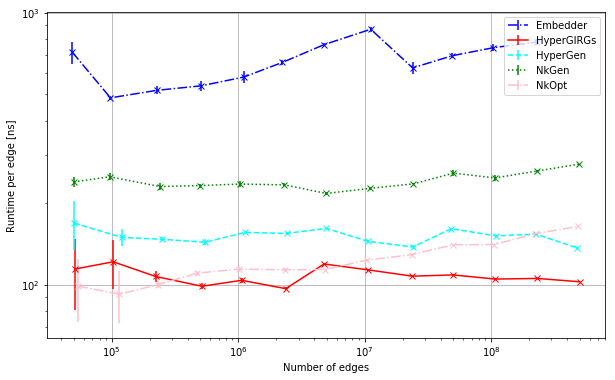



avgDeg=10, PLE=2.200 T=0.500
['HyperGIRGs' 'NkGen' 'Embedder']


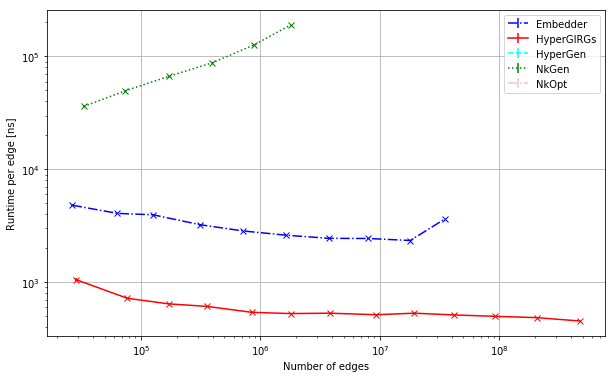



avgDeg=10, PLE=2.200 T=0.900
['HyperGIRGs' 'NkGen' 'Embedder']


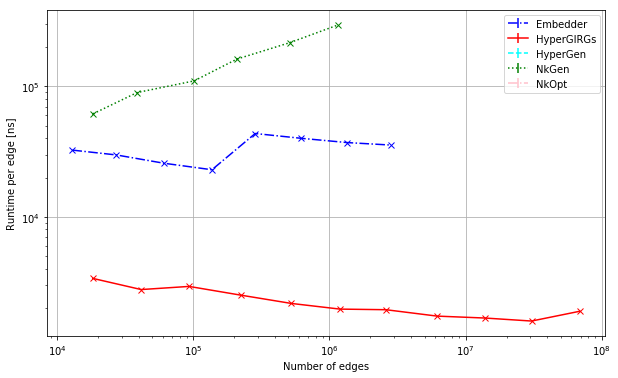



avgDeg=10, PLE=3.000 T=0.000
['HyperGIRGs' 'HyperGen' 'NkGen' 'NkOpt' 'Embedder']


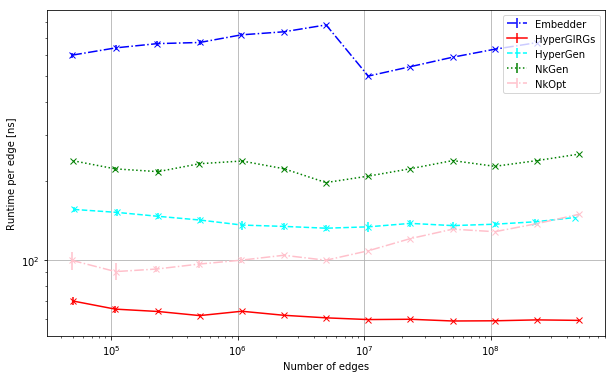



avgDeg=10, PLE=3.000 T=0.500
['HyperGIRGs' 'NkGen' 'Embedder']


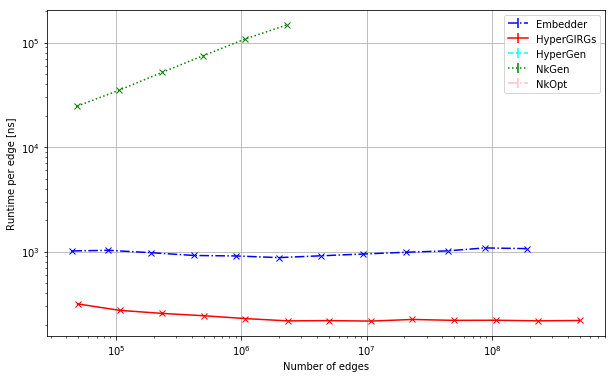



avgDeg=10, PLE=3.000 T=0.900
['HyperGIRGs' 'NkGen' 'Embedder']


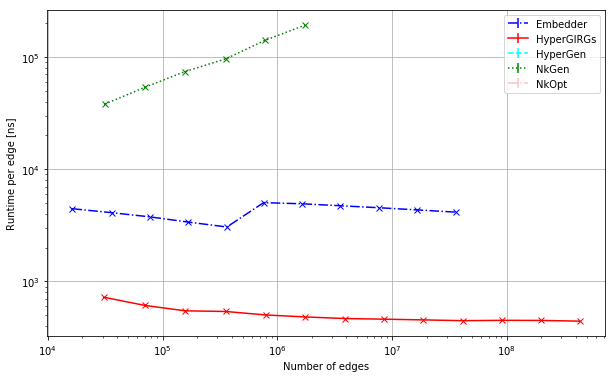



avgDeg=100, PLE=2.200 T=0.000
['HyperGIRGs' 'HyperGen' 'NkGen' 'NkOpt' 'Embedder']


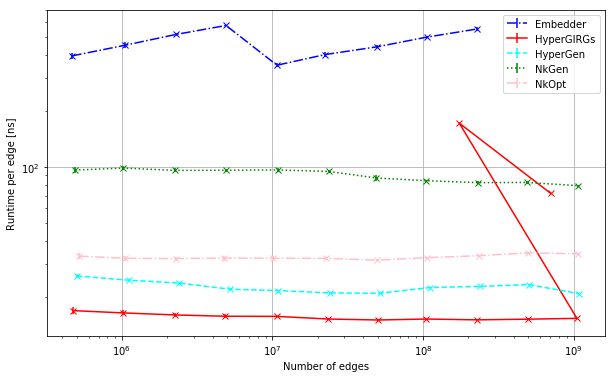



avgDeg=100, PLE=2.200 T=0.500
['HyperGIRGs' 'NkGen' 'Embedder']


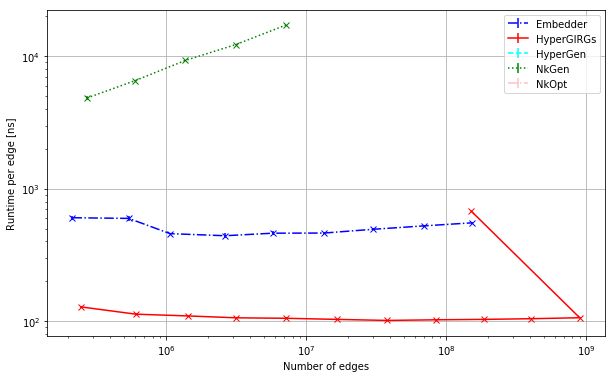



avgDeg=100, PLE=2.200 T=0.900
['HyperGIRGs' 'NkGen' 'Embedder']


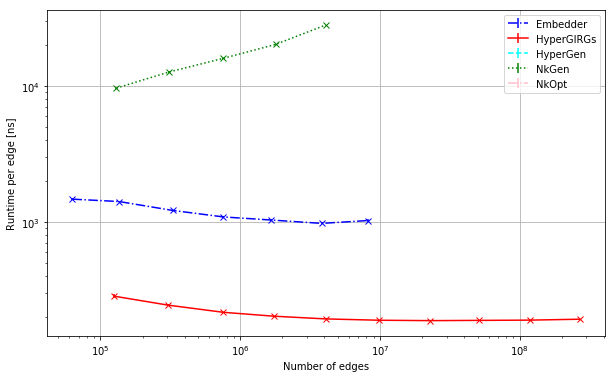



avgDeg=100, PLE=3.000 T=0.000
['HyperGIRGs' 'HyperGen' 'NkGen' 'NkOpt' 'Embedder']


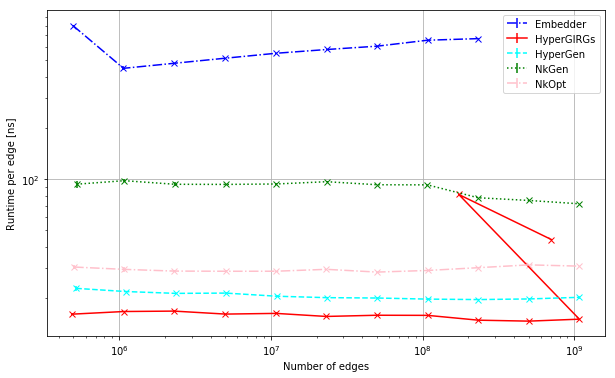



avgDeg=100, PLE=3.000 T=0.500
['HyperGIRGs' 'NkGen' 'Embedder']


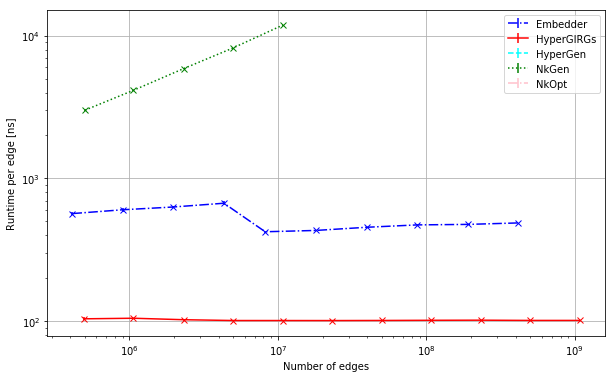



avgDeg=100, PLE=3.000 T=0.900
['HyperGIRGs' 'NkGen' 'Embedder']


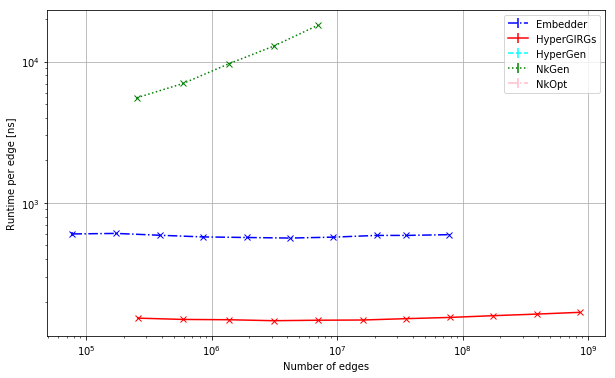



avgDeg=1000, PLE=2.200 T=0.000
['HyperGIRGs' 'HyperGen' 'NkGen' 'NkOpt' 'Embedder']


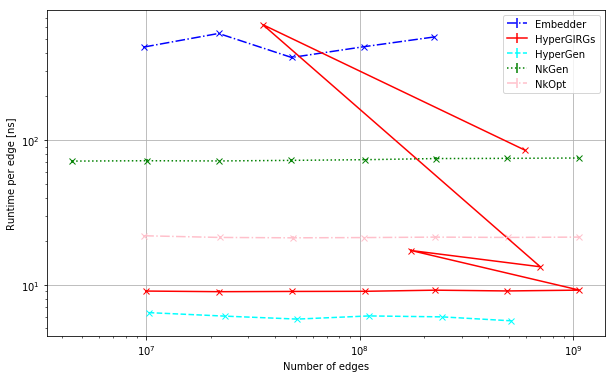



avgDeg=1000, PLE=2.200 T=0.500
['HyperGIRGs' 'NkGen' 'Embedder']


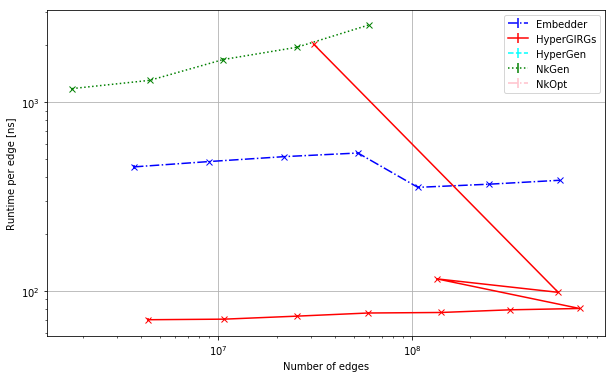



avgDeg=1000, PLE=2.200 T=0.900
['HyperGIRGs' 'NkGen' 'Embedder']


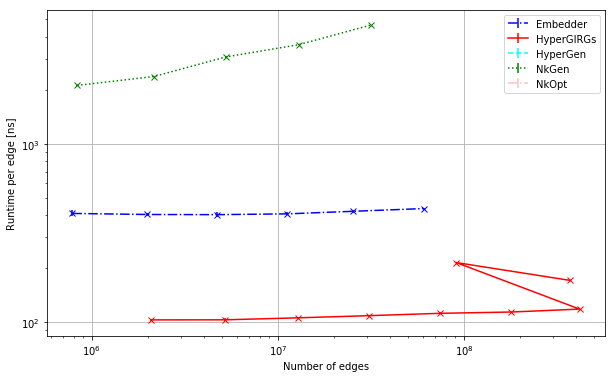



avgDeg=1000, PLE=3.000 T=0.000
['HyperGIRGs' 'HyperGen' 'NkGen' 'NkOpt' 'Embedder']


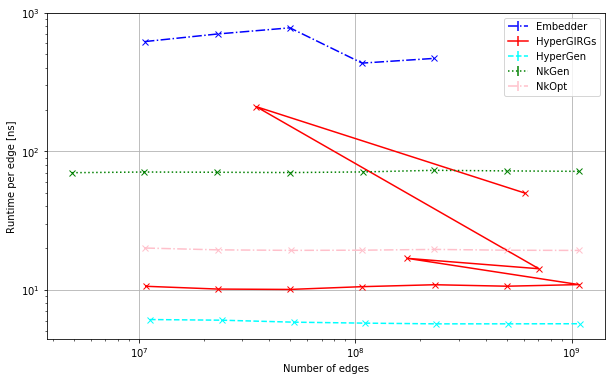



avgDeg=1000, PLE=3.000 T=0.500
['HyperGIRGs' 'NkGen' 'Embedder']


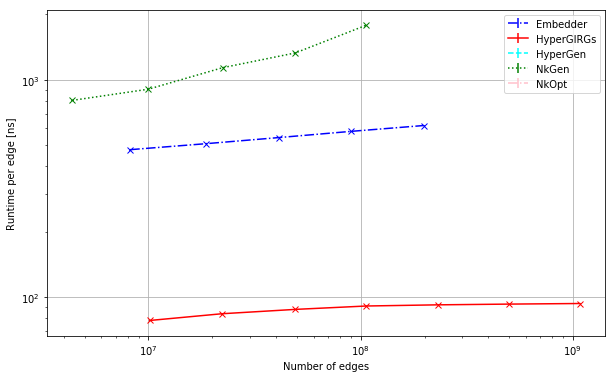



avgDeg=1000, PLE=3.000 T=0.900
['HyperGIRGs' 'NkGen' 'Embedder']


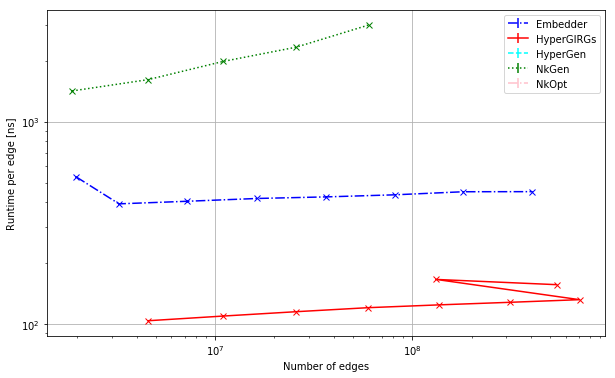

In [4]:
def ploteb(view, valueIndex, legend="", keyIndex = "n", ax = plt, color=None, ls = None):
    xs = view[keyIndex].median()
    ys = view[valueIndex].median() / xs * 1e6
    yerr = view[valueIndex].std() / xs * 1e6
    
    ax.plot(xs, ys, "x", color=color, label="")
    ax.errorbar(xs, ys, yerr, color=color, linestyle=ls, label=legend)
    
    return max(ys) if len(ys) else 0

algos = sorted(data.algo.unique())
for run, run_view in data.groupby(["avgDeg", "PLE", "T"]):
    title = "avgDeg=%d, PLE=%.3f T=%.3f" % run
    print("\n\n" + title)
    print(run_view.algo.unique())
    f, axs = plt.subplots(1, 1, sharey=True, figsize=(10,6))
    
    axs.set_ylabel("Runtime per edge [ns]")
    axs.set_xlabel("Number of edges")
    
    #axs.set_title(title)
    maxx = 0
    
    for i, algo in enumerate(algos):
        ax = axs
        ax.loglog()
        ax.grid()
        grp = run_view[run_view.algo==algo].groupby("n")
        maxx = max(maxx, ploteb(grp, "TimeTotal",   algo, ax = ax, keyIndex="GenNumEdge", color=colors[algo], ls = linestyles[algo]))
        
    
    plt.legend()
    plt.savefig("runtime_rhg_%d_%.1f_%.1f.pdf" % run)
    plt.show()
        
